In [7]:
import  pandas as pd
import numpy as np
matches = pd.read_csv('../datasets/matches_clean.csv')

In [8]:
matches.head(2)

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,2007,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,2007,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [13]:
matches.winner.value_counts().sort_values(ascending=False).head(1)

winner
Mumbai Indians    144
Name: count, dtype: int64

2. Toss Impact: Does winning the toss significantly increase the chances of winning the match?


In [17]:
matches.toss_decision.value_counts().sort_values(ascending=False)

toss_decision
field    704
bat      391
Name: count, dtype: int64

3. Biggest Wins: What are the top 5 matches with the highest winning margins?


In [21]:
matches.result_margin.value_counts().sort_values(ascending=False).head()

result_margin
6.0    131
7.0    130
5.0    109
8.0     85
4.0     74
Name: count, dtype: int64

4. Super Over Frequency: How often do matches go into a Super Over?


In [36]:
matches[matches['super_over']=='Y'].shape[0]

14

5. Venue Influence: Which stadium has hosted the most IPL matches?

In [39]:
matches.venue.value_counts().sort_values(ascending=False).head(1)

venue
Eden Gardens    77
Name: count, dtype: int64

6. Toss Decision Trends: Do teams prefer to bat first or chase more often after winning the toss?


In [53]:
matches.columns

Index(['season', 'city', 'date', 'match_type', 'player_of_match', 'venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over', 'method',
       'umpire1', 'umpire2'],
      dtype='object')

In [76]:
matches[matches['toss_decision']=='bat']['winner'].value_counts().sort_values(ascending=False).head(1)

winner
Chennai Super Kings    63
Name: count, dtype: int64

7. Best Chasing Teams: Which team has won the most matches while chasing a target?

In [77]:
matches.columns

Index(['season', 'city', 'date', 'match_type', 'player_of_match', 'venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over', 'method',
       'umpire1', 'umpire2'],
      dtype='object')

In [129]:
# Filter matches where the result was decided by wickets (i.e., chased successfully)
chasing_wins = matches[matches["result"] == "wickets"]

# Count the number of times each team won while chasing
chasing_wins_count = chasing_wins["winner"].value_counts()

# Count the number of times each team got a chance to chase
chasing_matches_count = matches[matches["team1"] != matches["toss_winner"]]["team1"].value_counts() + \
                        matches[matches["team2"] != matches["toss_winner"]]["team2"].value_counts()

# Calculate chase win percentage
chase_win_percentage = (chasing_wins_count / chasing_matches_count) * 100

# Display top chasing teams
chase_win_percentage.dropna().sort_values(ascending=False).head(10)


Gujarat Lions             80.000000
Gujarat Titans            73.913043
Kochi Tuskers Kerala      66.666667
Rajasthan Royals          66.336634
Mumbai Indians            60.169492
Kolkata Knight Riders     58.914729
Delhi Capitals            58.536585
Chennai Super Kings       57.758621
Delhi Daredevils          51.851852
Rising Pune Supergiant    50.000000
Name: count, dtype: float64

8. Player Performances: Who has won the most "Player of the Match" awards?


In [80]:
matches['player_of_match'].value_counts().sort_values(ascending=False).head(1)

player_of_match
AB de Villiers    25
Name: count, dtype: int64

9. Rain-Affected Matches: How many matches were decided by the "method" column (Duckworth-Lewis or other)?

In [116]:
matches.groupby('method').value_counts(ascending=False).sort_values(ascending=False).shape[0]

21

In [119]:
matches[matches['method']=='D/L'].value_counts().sort_values(ascending=False).shape[0]

21

10. Season Trends: Has the average winning margin changed over the seasons?

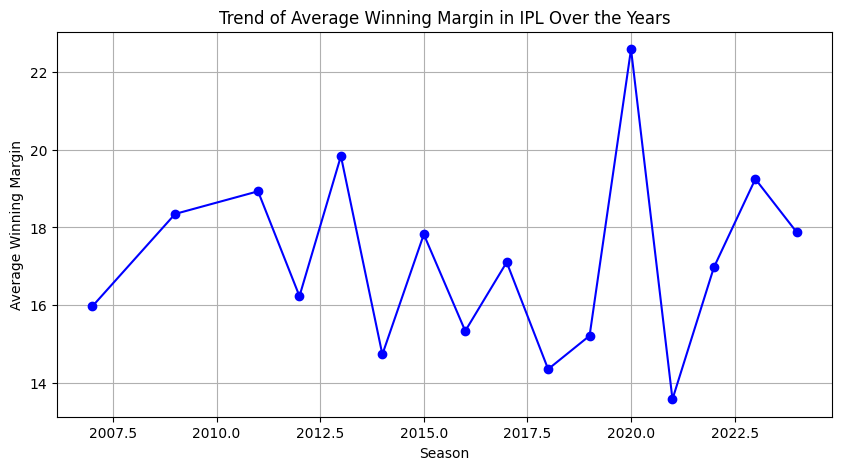

In [131]:
import matplotlib.pyplot as plt

# Group by season and calculate the average winning margin (for both runs and wickets)
season_trends = matches.groupby("season")["result_margin"].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(season_trends.index, season_trends.values, marker='o', linestyle='-', color='b')
plt.xlabel("Season")
plt.ylabel("Average Winning Margin")
plt.title("Trend of Average Winning Margin in IPL Over the Years")
plt.grid(True)
plt.show()
